In [1]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

In [2]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [3]:
df = fdr.DataReader('005930', '2018-01-01', '2023-01-01')

dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
Date,,,,
2018-01-02,0.568992,0.530992,0.567374,0.001877
2018-01-03,0.581838,0.542975,0.574525,0.002218
2018-01-04,0.577187,0.539050,0.565810,0.002590
2018-01-05,0.568106,0.538430,0.572067,0.002100
2018-01-08,0.580288,0.542562,0.575419,0.001857
...,...,...,...,...
2022-12-23,0.644518,0.603306,0.644693,0.108845
2022-12-26,0.642303,0.600207,0.644693,0.074817
2022-12-27,0.642303,0.603306,0.646927,0.118121


In [4]:
dfx=dfx.reset_index()
dfx

,Date,Open,High,Low,Volume
0,2018-01-02,0.568992,0.530992,0.567374,0.001877
1,2018-01-03,0.581838,0.542975,0.574525,0.002218
2,2018-01-04,0.577187,0.539050,0.565810,0.002590
3,2018-01-05,0.568106,0.538430,0.572067,0.002100
4,2018-01-08,0.580288,0.542562,0.575419,0.001857
...,...,...,...,...,...
1227,2022-12-23,0.644518,0.603306,0.644693,0.108845
1228,2022-12-26,0.642303,0.600207,0.644693,0.074817
1229,2022-12-27,0.642303,0.603306,0.646927,0.118121
1230,2022-12-28,0.637874,0.595041,0.630168,0.162397


In [5]:
dfx=dfx.set_index(keys='Date')
dfx

,Open,High,Low,Volume
Date,,,,
2018-01-02,0.568992,0.530992,0.567374,0.001877
2018-01-03,0.581838,0.542975,0.574525,0.002218
2018-01-04,0.577187,0.539050,0.565810,0.002590
2018-01-05,0.568106,0.538430,0.572067,0.002100
2018-01-08,0.580288,0.542562,0.575419,0.001857
...,...,...,...,...
2022-12-23,0.644518,0.603306,0.644693,0.108845
2022-12-26,0.642303,0.600207,0.644693,0.074817
2022-12-27,0.642303,0.603306,0.646927,0.118121


In [6]:
X = dfx.values.tolist()
y = dfy.values.tolist()

In [7]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] 
    _y = y[i + window_size]     
    data_X.append(_X)
    data_y.append(_y)

In [8]:
n=len(data_y)

train_X = np.array(data_X[0:int(n*0.7)])
train_y = np.array(data_y[0:int(n*0.7)])

val_X = np.array(data_X[int(n*0.7):int(n*0.9)])
val_y = np.array(data_y[int(n*0.7):int(n*0.9)])

test_X = np.array(data_X[int(n*0.9):])
test_y = np.array(data_y[int(n*0.9):])

In [9]:
validation_data = (val_X,val_y)

In [40]:
model = Sequential()
model.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(10, 4)))

model.add(Dropout(0.1))

model.add(LSTM(units=128, activation='relu',return_sequences=True))

model.add(Dropout(0.1))

model.add(LSTM(units=128, activation='relu'))

model.add(Dropout(0.1))

model.add(Dense(units=1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 10, 128)           68096     
                                                                 
 dropout_12 (Dropout)        (None, 10, 128)           0         
                                                                 
 lstm_14 (LSTM)              (None, 10, 128)           131584    
                                                                 
 dropout_13 (Dropout)        (None, 10, 128)           0         
                                                                 
 lstm_15 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                

In [41]:
model.compile(optimizer='adam', 
              loss='mean_squared_error')
model.fit(train_X, 
          train_y, 
          epochs=100, 
          batch_size=30)



pred_y = model.predict(test_X)

Epoch 1/100
29/29 [==============================] - 4s 22ms/step - loss: 0.0512
Epoch 2/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0137
Epoch 3/100
29/29 [==============================] - 1s 20ms/step - loss: 0.0058
Epoch 4/100
29/29 [==============================] - 1s 17ms/step - loss: 0.0053
Epoch 5/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0045
Epoch 6/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0043
Epoch 7/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0044
Epoch 8/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0039
Epoch 9/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0035
Epoch 10/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0031
Epoch 11/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0029
Epoch 12/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0027
Epoch 13/100
29/29 [=====

4/4 [==============================] - 0s 7ms/step


In [42]:
test_y.shape

(123, 1)

In [43]:
pred_y.shape

(123, 1)

4/4 [==============================] - 0s 7ms/step


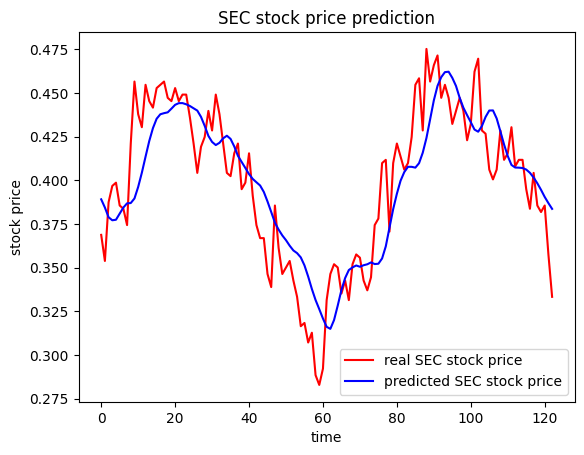

In [44]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [31]:
mse = model.evaluate(test_X, test_y, batch_size=30)
print("mse :", mse)

y_predict = model.predict(test_X)
print(y_predict)

5/5 [==============================] - 0s 3ms/step - loss: 7.3442e-04
mse : 0.0007344181649386883
4/4 [==============================] - 0s 4ms/step
[[0.39291894]
 [0.38831955]
 [0.38410848]
 [0.38228154]
 [0.3816083 ]
 [0.3825034 ]
 [0.3830583 ]
 [0.38443726]
 [0.38634396]
 [0.3907349 ]
 [0.399683  ]
 [0.40779984]
 [0.4174729 ]
 [0.42571223]
 [0.4322704 ]
 [0.43689132]
 [0.4403906 ]
 [0.44388735]
 [0.44923854]
 [0.45518172]
 [0.45742416]
 [0.45876783]
 [0.45873433]
 [0.45816493]
 [0.45725423]
 [0.45650828]
 [0.455387  ]
 [0.45125943]
 [0.44595045]
 [0.4404779 ]
 [0.43852383]
 [0.4361658 ]
 [0.43579167]
 [0.43476266]
 [0.43349272]
 [0.43129253]
 [0.4294151 ]
 [0.42720437]
 [0.42666125]
 [0.4242233 ]
 [0.42066556]
 [0.4176889 ]
 [0.41537708]
 [0.41114193]
 [0.40541154]
 [0.39858156]
 [0.3921858 ]
 [0.38528824]
 [0.38034892]
 [0.37516427]
 [0.3705821 ]
 [0.3657837 ]
 [0.36154783]
 [0.35866076]
 [0.35477298]
 [0.34967965]
 [0.34421575]
 [0.3383276 ]
 [0.3321566 ]
 [0.32692865]
 [0.3200237

In [32]:
#RMSE 구하기

from sklearn.metrics import mean_squared_error

def RMSE(test_y, y_predict):
   return np.sqrt(mean_squared_error(test_y, y_predict))
print("RMSE :", RMSE(test_y, y_predict))

# R2 구하기
from sklearn.metrics import r2_score
f2_y_predict = r2_score(test_y, y_predict)
print("R2 :", f2_y_predict)

RMSE : 0.027100151426935566
R2 : 0.6390861943232911


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 10, 128)          35328     
 nal)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 10, 128)           0         
                                                                 
 dense_7 (Dense)             (None, 10, 1)             129       
                                                                 
Total params: 35,457
Trainable params: 35,457
Non-trainable params: 0
_________________________________________________________________


In [141]:
model2 = Sequential()


forward_layer = LSTM(64, return_sequences=True)
backward_layer = LSTM(64, activation='relu', return_sequences=True,
                      go_backwards=True)

model2.add(Bidirectional(forward_layer, backward_layer=backward_layer,
                        input_shape=(10, 4)))

model2.add(Dropout(0.2))

model2.add(Bidirectional(LSTM(64)))

model2.add(Dropout(0.2))

model2.add(Dense(units=1))


model2.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_57 (Bidirecti  (None, 10, 128)          35328     
 onal)                                                           
                                                                 
 dropout_56 (Dropout)        (None, 10, 128)           0         
                                                                 
 bidirectional_58 (Bidirecti  (None, 128)              98816     
 onal)                                                           
                                                                 
 dropout_57 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 1)                 129       
                                                                 
Total params: 134,273
Trainable params: 134,273
Non-t

In [142]:
model2.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae','acc']
             )
model2.fit(train_X, 
          train_y, 
          epochs=100, 
          batch_size=30,
          validation_data=validation_data
         )



pred_y = model2.predict(test_X)

Epoch 1/100
29/29 [==============================] - 8s 62ms/step - loss: 0.0293 - mae: 0.1371 - acc: 0.0023 - val_loss: 0.0120 - val_mae: 0.1001 - val_acc: 0.0000e+00
Epoch 2/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0065 - mae: 0.0624 - acc: 0.0023 - val_loss: 0.0015 - val_mae: 0.0291 - val_acc: 0.0000e+00
Epoch 3/100
29/29 [==============================] - 1s 17ms/step - loss: 0.0043 - mae: 0.0483 - acc: 0.0023 - val_loss: 0.0027 - val_mae: 0.0454 - val_acc: 0.0000e+00
Epoch 4/100
29/29 [==============================] - 1s 17ms/step - loss: 0.0042 - mae: 0.0474 - acc: 0.0023 - val_loss: 0.0015 - val_mae: 0.0300 - val_acc: 0.0000e+00
Epoch 5/100
29/29 [==============================] - 1s 17ms/step - loss: 0.0034 - mae: 0.0431 - acc: 0.0023 - val_loss: 0.0014 - val_mae: 0.0269 - val_acc: 0.0000e+00
Epoch 6/100
29/29 [==============================] - 1s 17ms/step - loss: 0.0034 - mae: 0.0437 - acc: 0.0023 - val_loss: 0.0017 - val_mae: 0.0342 - val_acc: 0.0

29/29 [==============================] - 0s 17ms/step - loss: 0.0013 - mae: 0.0268 - acc: 0.0023 - val_loss: 0.0013 - val_mae: 0.0271 - val_acc: 0.0000e+00
Epoch 50/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0016 - mae: 0.0300 - acc: 0.0023 - val_loss: 0.0011 - val_mae: 0.0247 - val_acc: 0.0000e+00
Epoch 51/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0013 - mae: 0.0272 - acc: 0.0023 - val_loss: 9.7972e-04 - val_mae: 0.0234 - val_acc: 0.0000e+00
Epoch 52/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0014 - mae: 0.0273 - acc: 0.0023 - val_loss: 0.0027 - val_mae: 0.0436 - val_acc: 0.0000e+00
Epoch 53/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0015 - mae: 0.0295 - acc: 0.0023 - val_loss: 9.8472e-04 - val_mae: 0.0234 - val_acc: 0.0000e+00
Epoch 54/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0013 - mae: 0.0273 - acc: 0.0023 - val_loss: 0.0014 - val_mae: 0.0307 - val_acc: 0.

29/29 [==============================] - 1s 19ms/step - loss: 0.0010 - mae: 0.0237 - acc: 0.0023 - val_loss: 8.6083e-04 - val_mae: 0.0217 - val_acc: 0.0000e+00
Epoch 98/100
29/29 [==============================] - 1s 17ms/step - loss: 0.0011 - mae: 0.0249 - acc: 0.0023 - val_loss: 7.9342e-04 - val_mae: 0.0211 - val_acc: 0.0000e+00
Epoch 99/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0011 - mae: 0.0253 - acc: 0.0023 - val_loss: 0.0015 - val_mae: 0.0293 - val_acc: 0.0000e+00
Epoch 100/100
4/4 [==============================] - 1s 5ms/step


4/4 [==============================] - 0s 6ms/step


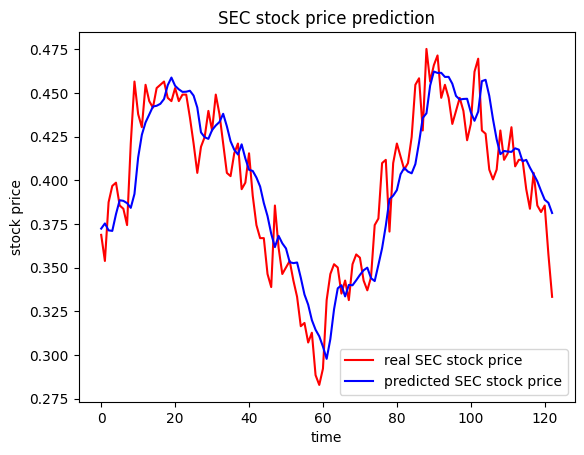

In [143]:
pred_y = model2.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [144]:
mse = model2.evaluate(test_X, test_y, batch_size=30)
print("mse :", mse)

y_predict = model2.predict(test_X)
print(y_predict)

5/5 [==============================] - 0s 5ms/step - loss: 4.3429e-04 - mae: 0.0166 - acc: 0.0000e+00
mse : [0.00043428927892819047, 0.016630709171295166, 0.0]
4/4 [==============================] - 0s 5ms/step
[[0.3724    ]
 [0.37534988]
 [0.3713898 ]
 [0.37108296]
 [0.38066626]
 [0.38863337]
 [0.38828248]
 [0.38698882]
 [0.38427216]
 [0.39225316]
 [0.4131632 ]
 [0.4261009 ]
 [0.43318534]
 [0.43771505]
 [0.44228876]
 [0.44270337]
 [0.4438215 ]
 [0.44657457]
 [0.45449758]
 [0.4588657 ]
 [0.45413947]
 [0.4521231 ]
 [0.45065767]
 [0.45076728]
 [0.45131713]
 [0.44852954]
 [0.44168258]
 [0.4274733 ]
 [0.424702  ]
 [0.42377532]
 [0.42881286]
 [0.43142104]
 [0.43343687]
 [0.43811792]
 [0.43095988]
 [0.42241478]
 [0.41754633]
 [0.41482455]
 [0.42063123]
 [0.4126017 ]
 [0.4060828 ]
 [0.40539062]
 [0.40162563]
 [0.39648527]
 [0.38703585]
 [0.37959772]
 [0.36945713]
 [0.36181206]
 [0.36822963]
 [0.36398298]
 [0.36103052]
 [0.35318696]
 [0.35263175]
 [0.35299313]
 [0.34429777]
 [0.3346693 ]
 [0.3

In [145]:
#RMSE 구하기

from sklearn.metrics import mean_squared_error

def RMSE(test_y, y_predict):
   return np.sqrt(mean_squared_error(test_y, y_predict))
print("RMSE :", RMSE(test_y, y_predict))

# R2 구하기
from sklearn.metrics import r2_score
f2_y_predict = r2_score(test_y, y_predict)
print("R2 :", f2_y_predict)

RMSE : 0.020839610513056644
R2 : 0.7865779655272369


In [90]:
model3 = Sequential()

model3.add(Bidirectional(LSTM(64, return_sequences=True),
                             input_shape=(10, 4)))

model3.add(Dropout(0.2))

model3.add(Bidirectional(LSTM(64)))

model3.add(Dropout(0.2))

model3.add(Dense(units=1))


model3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_19 (Bidirecti  (None, 10, 128)          35328     
 onal)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 10, 128)           0         
                                                                 
 bidirectional_20 (Bidirecti  (None, 128)              98816     
 onal)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 134,273
Trainable params: 134,273
Non-t

In [91]:
model3.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae','acc']
             )
model3.fit(train_X, 
          train_y, 
          epochs=100, 
          batch_size=30,
          validation_data=validation_data
         )



pred_y1 = model3.predict(test_X)

Epoch 1/100
29/29 [==============================] - 9s 69ms/step - loss: 0.0360 - mae: 0.1515 - acc: 0.0023 - val_loss: 0.0231 - val_mae: 0.1403 - val_acc: 0.0000e+00
Epoch 2/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0100 - mae: 0.0782 - acc: 0.0023 - val_loss: 0.0032 - val_mae: 0.0494 - val_acc: 0.0000e+00
Epoch 3/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0050 - mae: 0.0518 - acc: 0.0023 - val_loss: 0.0031 - val_mae: 0.0494 - val_acc: 0.0000e+00
Epoch 4/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0043 - mae: 0.0488 - acc: 0.0023 - val_loss: 0.0030 - val_mae: 0.0433 - val_acc: 0.0000e+00
Epoch 5/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0044 - mae: 0.0497 - acc: 0.0023 - val_loss: 0.0017 - val_mae: 0.0299 - val_acc: 0.0000e+00
Epoch 6/100
29/29 [==============================] - 0s 17ms/step - loss: 0.0035 - mae: 0.0435 - acc: 0.0023 - val_loss: 0.0032 - val_mae: 0.0454 - val_acc: 0.0

29/29 [==============================] - 0s 17ms/step - loss: 0.0021 - mae: 0.0320 - acc: 0.0023 - val_loss: 0.0019 - val_mae: 0.0339 - val_acc: 0.0000e+00
Epoch 50/100
29/29 [==============================] - 1s 21ms/step - loss: 0.0021 - mae: 0.0325 - acc: 0.0023 - val_loss: 0.0013 - val_mae: 0.0259 - val_acc: 0.0000e+00
Epoch 51/100
29/29 [==============================] - 1s 17ms/step - loss: 0.0019 - mae: 0.0315 - acc: 0.0023 - val_loss: 0.0025 - val_mae: 0.0407 - val_acc: 0.0000e+00
Epoch 52/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0021 - mae: 0.0317 - acc: 0.0023 - val_loss: 0.0015 - val_mae: 0.0284 - val_acc: 0.0000e+00
Epoch 53/100
29/29 [==============================] - 1s 18ms/step - loss: 0.0022 - mae: 0.0333 - acc: 0.0023 - val_loss: 0.0020 - val_mae: 0.0348 - val_acc: 0.0000e+00
Epoch 54/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0022 - mae: 0.0337 - acc: 0.0023 - val_loss: 0.0018 - val_mae: 0.0329 - val_acc: 0.0000e+00

29/29 [==============================] - 0s 17ms/step - loss: 0.0013 - mae: 0.0265 - acc: 0.0023 - val_loss: 0.0010 - val_mae: 0.0252 - val_acc: 0.0000e+00
Epoch 98/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0013 - mae: 0.0274 - acc: 0.0023 - val_loss: 7.4999e-04 - val_mae: 0.0209 - val_acc: 0.0000e+00
Epoch 99/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0014 - mae: 0.0276 - acc: 0.0023 - val_loss: 8.0450e-04 - val_mae: 0.0219 - val_acc: 0.0000e+00
Epoch 100/100
4/4 [==============================] - 2s 4ms/step


In [92]:
test_y.shape

(123, 1)

In [93]:
pred_y1.shape

(123, 1)

4/4 [==============================] - 0s 6ms/step


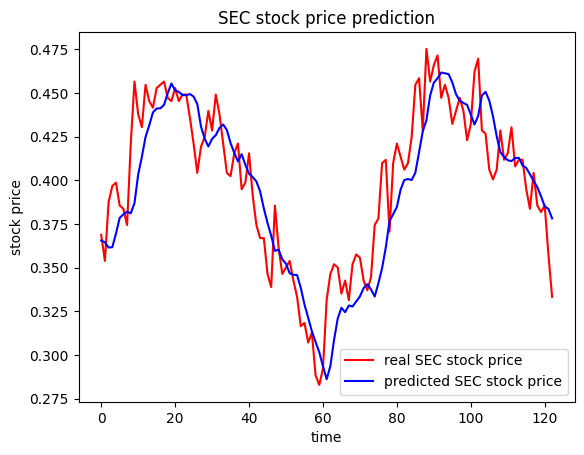

In [94]:
pred_y = model3.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [95]:
mse = model3.evaluate(test_X, test_y, batch_size=30)
print("mse :", mse)

y_predict = model3.predict(test_X)
print(y_predict)

5/5 [==============================] - 0s 5ms/step - loss: 5.2418e-04 - mae: 0.0177 - acc: 0.0000e+00
mse : [0.0005241810576990247, 0.017687292769551277, 0.0]
4/4 [==============================] - 0s 5ms/step
[[0.36556816]
 [0.36458346]
 [0.36156574]
 [0.36172393]
 [0.36957037]
 [0.37854645]
 [0.38054192]
 [0.38209328]
 [0.38113984]
 [0.3868973 ]
 [0.40325716]
 [0.4134602 ]
 [0.424888  ]
 [0.43150312]
 [0.4389194 ]
 [0.4411364 ]
 [0.4412891 ]
 [0.44320324]
 [0.4499025 ]
 [0.45545194]
 [0.45157954]
 [0.4506214 ]
 [0.44889557]
 [0.44878325]
 [0.44942656]
 [0.44797957]
 [0.44370037]
 [0.43083715]
 [0.42385575]
 [0.41942468]
 [0.423748  ]
 [0.42588374]
 [0.4300345 ]
 [0.4320148 ]
 [0.42882743]
 [0.42138305]
 [0.4157783 ]
 [0.4108841 ]
 [0.41500697]
 [0.40894333]
 [0.40378934]
 [0.401917  ]
 [0.39932367]
 [0.39365363]
 [0.3839721 ]
 [0.3756095 ]
 [0.36825874]
 [0.35967386]
 [0.36025685]
 [0.3548164 ]
 [0.35224566]
 [0.34682402]
 [0.34596798]
 [0.34576163]
 [0.33850855]
 [0.32894516]
 [0.32

In [96]:
#RMSE 구하기

from sklearn.metrics import mean_squared_error

def RMSE(test_y, y_predict):
   return np.sqrt(mean_squared_error(test_y, y_predict))
print("RMSE :", RMSE(test_y, y_predict))

# R2 구하기
from sklearn.metrics import r2_score
f2_y_predict = r2_score(test_y, y_predict)
print("R2 :", f2_y_predict)

RMSE : 0.022895000637257787
R2 : 0.7424026566456305
